# Importing Necessary Libraries

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

# Loss and Accuracy Graph Plots

## Loading the Model History DataFrame

In [6]:
hist_df = pd.read_csv("../History 1D.csv")
hist_df["epoch"] = hist_df.index + 1

accuracy_df = hist_df.melt(id_vars = "epoch", value_vars=["accuracy", "val_accuracy"], var_name="Dataset", value_name="Accuracy")
loss_df = hist_df.melt(id_vars = "epoch", value_vars = ["loss", "val_loss"], var_name = "Dataset", value_name=  "Loss")

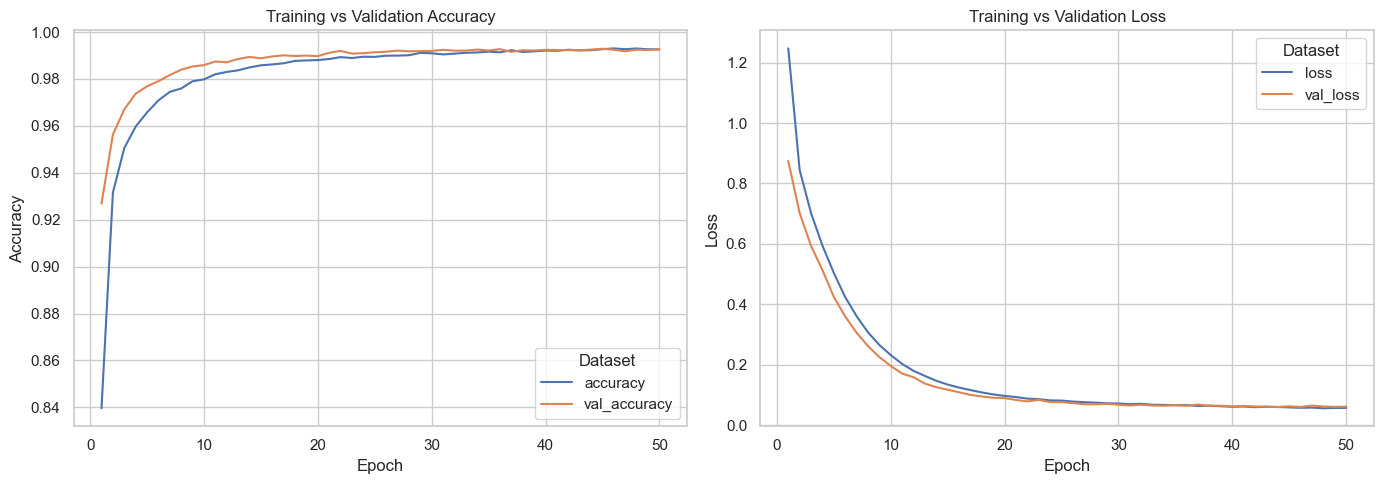

In [9]:
sns.set(style="whitegrid")

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Accuracy plot
sns.lineplot(data=accuracy_df, x="epoch", y="Accuracy", hue="Dataset", ax=axes[0])
axes[0].set_title("Training vs Validation Accuracy")
axes[0].set_xlabel("Epoch")
axes[0].set_ylabel("Accuracy")

# Loss plot
sns.lineplot(data=loss_df, x="epoch", y="Loss", hue="Dataset", ax=axes[1])
axes[1].set_title("Training vs Validation Loss")
axes[1].set_xlabel("Epoch")
axes[1].set_ylabel("Loss")

plt.tight_layout()

plt.savefig("../Plots/1D/Combined Graphs 1D.png", dpi=300)  # High-res PNG
plt.show()

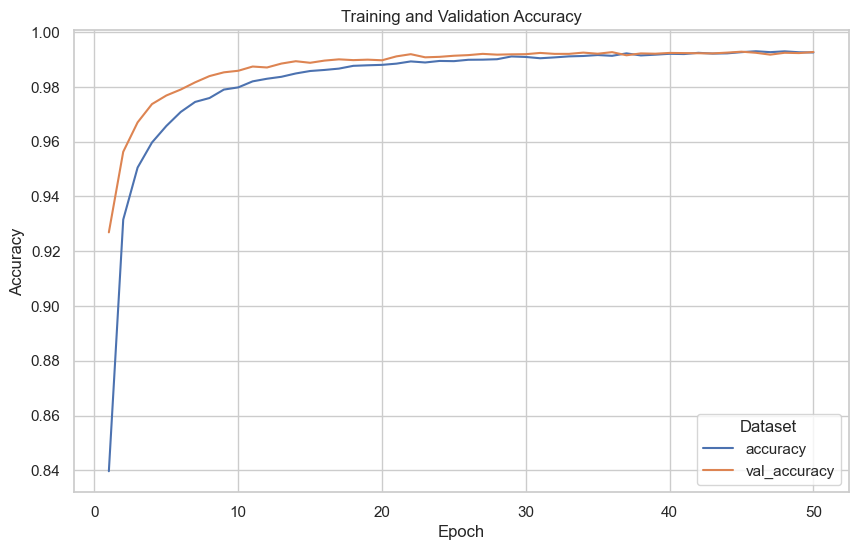

In [10]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.lineplot(data=accuracy_df, x="epoch", y="Accuracy", hue="Dataset")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(title="Dataset")
plt.savefig("../Plots/1D/Accuracy Graphs 1D.png", dpi=300)  # High-res PNG
plt.show()

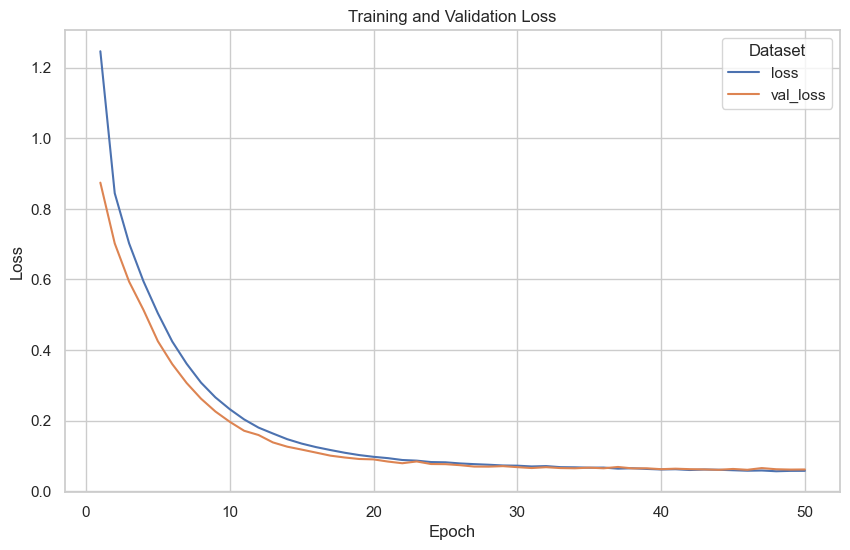

In [11]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=loss_df, x="epoch", y="Loss", hue="Dataset")
plt.title("Training and Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(title="Dataset")
plt.savefig("../Plots/1D/Loss Graphs 1D.png", dpi=300)
plt.show()

# Confusion Matrix

## Loading the Model and the Data

In [17]:
model = tf.keras.models.load_model("../Models/Model 1D.h5")

In [19]:
X = np.load("../Features.npy")
y = np.load("../Labels (Mutli Class).npy")

## Splitting the Data and Performing Model Prediction

In [22]:
_, X_test, _, y_test = train_test_split(X, y, shuffle = True, random_state = 10, test_size = 0.2)

In [24]:
X_test.shape, y_test.shape

((21884, 250, 2), (21884,))

In [26]:
y_pred_probs = model.predict(X_test)
y_pred = y_pred_probs.argmax(axis = 1)

684/684 [==============================] - 2s 2ms/step


In [27]:
y_true = y_test

### Check for Missing Labels in y_true and y_pred

Carefully check the labels of both the True and the Predicted labels, then proceed to plotting the Confusion Matrix

In [30]:
values, _ = np.unique(y_true, return_counts = True)

In [31]:
values

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13],
      dtype=int64)

In [32]:
np.unique(y_true, return_counts = True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13],
       dtype=int64),
 array([ 1352,   501,    21,   149,    22,  1620, 15135,  1411,     1,
         1407,    28,     6,   191,    40], dtype=int64))

In [38]:
np.unique(y_pred, return_counts = True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  9, 10, 11, 12, 13], dtype=int64),
 array([ 1350,   479,    21,   154,    21,  1620, 15159,  1415,  1395,
           27,     4,   193,    46], dtype=int64))

## Plotting

In [41]:
cm = confusion_matrix(y_true, y_pred)

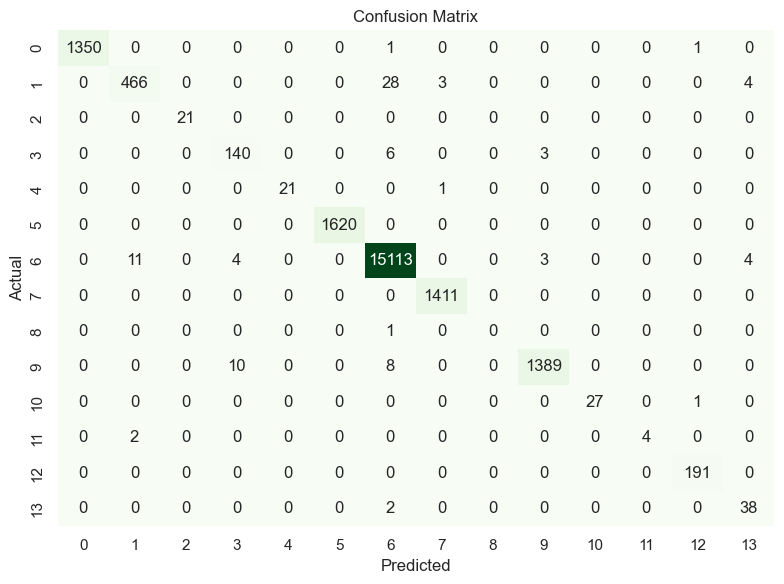

In [43]:
plt.figure(figsize = (8, 6))
sns.heatmap(cm, annot = True, fmt = "d", cmap = "Greens", cbar = False, xticklabels = values, yticklabels = values)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.tight_layout()

# Save the plot
plt.savefig("../Plots/1D/Confusion Matrix 1D.png", dpi=300)
plt.show()

# Classification Report

There will be a warninbg when running the below cell, when there is a class missing in the true labels.

In [46]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1352
           1       0.97      0.93      0.95       501
           2       1.00      1.00      1.00        21
           3       0.91      0.94      0.92       149
           4       1.00      0.95      0.98        22
           5       1.00      1.00      1.00      1620
           6       1.00      1.00      1.00     15135
           7       1.00      1.00      1.00      1411
           8       0.00      0.00      0.00         1
           9       1.00      0.99      0.99      1407
          10       1.00      0.96      0.98        28
          11       1.00      0.67      0.80         6
          12       0.99      1.00      0.99       191
          13       0.83      0.95      0.88        40

    accuracy                           1.00     21884
   macro avg       0.91      0.88      0.89     21884
weighted avg       1.00      1.00      1.00     21884



C:\Users\neelo\anaconda3\envs\Tensorflow-GPU\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\neelo\anaconda3\envs\Tensorflow-GPU\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\neelo\anaconda3\envs\Tensorflow-GPU\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()